# Idea del modelo

## Introducción

Un banco (acreedor) al prestar un crédito a una persona o empresa (el deudor). Se corre el riesgo de que el deudor no pague, por lo que en este proyecto se enforacara en cual es probabilidad de que un deudor no pague a tiempo un crédito

## Preambulo

In [1]:
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from math import sqrt

## Lectura

In [2]:
data = pyreadr.read_r("loan_data_ch1.rds")[None]
print(data.shape)

(29092, 8)


In [3]:
data.head(10)

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
rownames,,,,,,,,
1,0,5000,10.65,B,10,RENT,24000.0,33
2,0,2400,NaN,C,25,RENT,12252.0,31
3,0,10000,13.49,C,13,RENT,49200.0,24
4,0,5000,NaN,A,3,RENT,36000.0,39
5,0,3000,NaN,E,9,RENT,48000.0,24
6,0,12000,12.69,B,11,OWN,75000.0,28
7,1,9000,13.49,C,0,RENT,30000.0,22
8,0,3000,9.91,B,3,RENT,15000.0,22
9,1,10000,10.65,B,3,RENT,100000.0,28


En loan_status indica si el cliente no imcumplio (0) o si incumplio (1)

In [4]:
print(data["home_ownership"].value_counts())

home_ownership
RENT        14692
MORTGAGE    12002
OWN          2301
OTHER          97
Name: count, dtype: int64


In [5]:
round(pd.crosstab(data["home_ownership"], data["loan_status"], margins=True), 3)

loan_status,0,1,All
home_ownership,,,
MORTGAGE,10821,1181,12002
OTHER,80,17,97
OWN,2049,252,2301
RENT,12915,1777,14692
All,25865,3227,29092


## Graficando

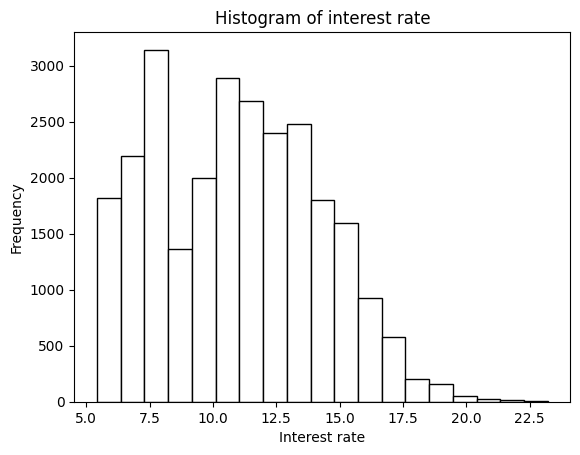

In [6]:
plt.hist(data[["int_rate"]], color = "white", edgecolor = "black", bins = 19)
plt.xlabel("Interest rate")
plt.ylabel("Frequency")
plt.title("Histogram of interest rate")
plt.show()

Se puede usar lo siguiente para dividir los contenedores del siguiente histograma, cosa que no hice aquí, en principio

$$\sqrt{\text{len(datos)}}$$

In [7]:
cont = [x for x in range(0, int(max(data["annual_inc"])), 50000)]

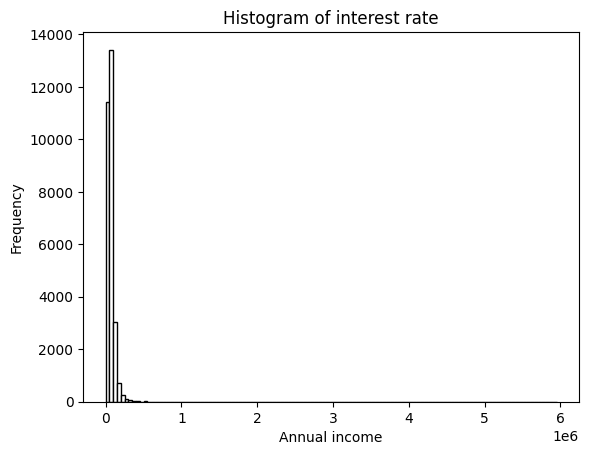

In [8]:
n, bins, patches = plt.hist(data[["annual_inc"]], color = "white", edgecolor = "black", bins = cont)
plt.xlabel("Annual income")
plt.ylabel("Frequency")
plt.title("Histogram of interest rate")
plt.show()

In [9]:
print(bins)

[      0.   50000.  100000.  150000.  200000.  250000.  300000.  350000.
  400000.  450000.  500000.  550000.  600000.  650000.  700000.  750000.
  800000.  850000.  900000.  950000. 1000000. 1050000. 1100000. 1150000.
 1200000. 1250000. 1300000. 1350000. 1400000. 1450000. 1500000. 1550000.
 1600000. 1650000. 1700000. 1750000. 1800000. 1850000. 1900000. 1950000.
 2000000. 2050000. 2100000. 2150000. 2200000. 2250000. 2300000. 2350000.
 2400000. 2450000. 2500000. 2550000. 2600000. 2650000. 2700000. 2750000.
 2800000. 2850000. 2900000. 2950000. 3000000. 3050000. 3100000. 3150000.
 3200000. 3250000. 3300000. 3350000. 3400000. 3450000. 3500000. 3550000.
 3600000. 3650000. 3700000. 3750000. 3800000. 3850000. 3900000. 3950000.
 4000000. 4050000. 4100000. 4150000. 4200000. 4250000. 4300000. 4350000.
 4400000. 4450000. 4500000. 4550000. 4600000. 4650000. 4700000. 4750000.
 4800000. 4850000. 4900000. 4950000. 5000000. 5050000. 5100000. 5150000.
 5200000. 5250000. 5300000. 5350000. 5400000. 54500

In [10]:
print("Detalles de cada bin:")
for i in range(len(bins)-1):
    print(f"Bin {i+1}: [{bins[i]:.2f}, {bins[i+1]:.2f}] - frecuencia: {n[i]}")

Detalles de cada bin:
Bin 1: [0.00, 50000.00] - frecuencia: 11411.0
Bin 2: [50000.00, 100000.00] - frecuencia: 13418.0
Bin 3: [100000.00, 150000.00] - frecuencia: 3045.0
Bin 4: [150000.00, 200000.00] - frecuencia: 726.0
Bin 5: [200000.00, 250000.00] - frecuencia: 250.0
Bin 6: [250000.00, 300000.00] - frecuencia: 86.0
Bin 7: [300000.00, 350000.00] - frecuencia: 60.0
Bin 8: [350000.00, 400000.00] - frecuencia: 23.0
Bin 9: [400000.00, 450000.00] - frecuencia: 13.0
Bin 10: [450000.00, 500000.00] - frecuencia: 8.0
Bin 11: [500000.00, 550000.00] - frecuencia: 9.0
Bin 12: [550000.00, 600000.00] - frecuencia: 5.0
Bin 13: [600000.00, 650000.00] - frecuencia: 8.0
Bin 14: [650000.00, 700000.00] - frecuencia: 2.0
Bin 15: [700000.00, 750000.00] - frecuencia: 5.0
Bin 16: [750000.00, 800000.00] - frecuencia: 5.0
Bin 17: [800000.00, 850000.00] - frecuencia: 3.0
Bin 18: [850000.00, 900000.00] - frecuencia: 1.0
Bin 19: [900000.00, 950000.00] - frecuencia: 5.0
Bin 20: [950000.00, 1000000.00] - frecuencia

In [11]:
indice = np.array(data.index)

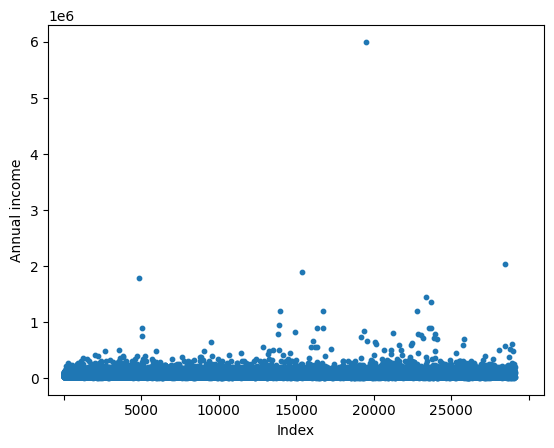

In [12]:
plt.scatter(indice, data[["annual_inc"]], s = 10)
plt.xlabel("Index")
plt.ylabel("Annual income")
plt.xticks(np.arange(-1, 35000, 5000))
plt.xlim(-1000, 31000)
plt.show()

Se quiere eliminar lo que ganan mas de $3.000.000 anuales

In [13]:
data_expert = data[data["annual_inc"]<=3000000]
data_expert.shape

(29091, 8)

Ahora se sacan los outliers fuera del rango intercuatil

In [14]:
intecuartile_range = np.quantile(data["annual_inc"], 0.75) - np.quantile(data["annual_inc"], 0.25)
outliers_sup = np.quantile(data["annual_inc"], 0.75)+1.5*intecuartile_range

In [15]:
data_ROT = data[data["annual_inc"]<=outliers_sup]
data_ROT.shape

(27710, 8)

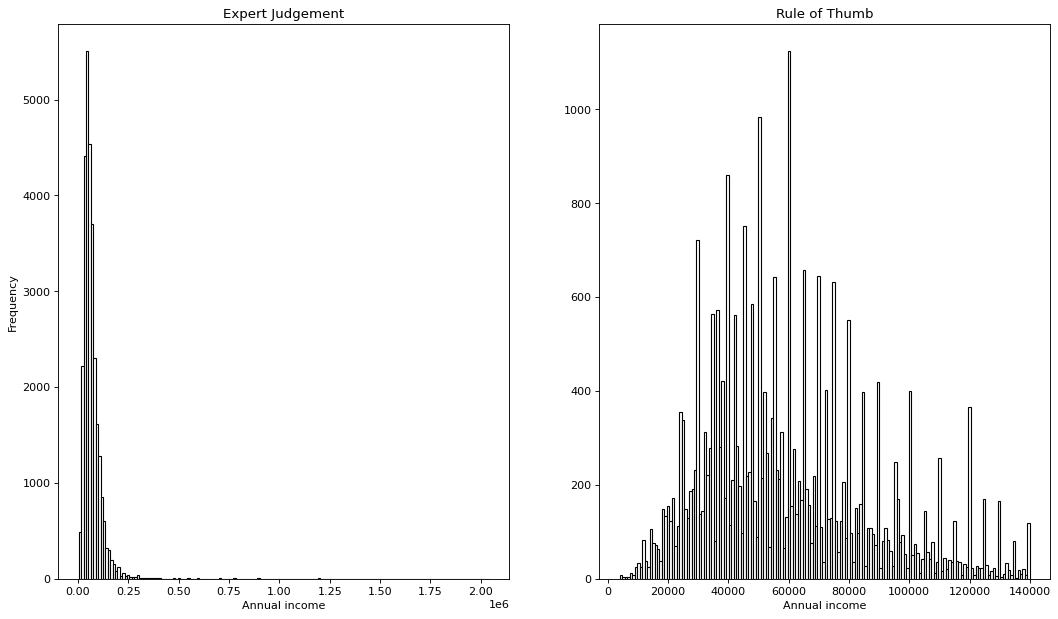

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (16, 9), dpi = 80)
ax[0].hist(data_expert[["annual_inc"]], color = "white", edgecolor = "black", bins = int(sqrt(len(data_expert["loan_status"]))))
ax[0].set_title("Expert Judgement")
ax[0].set_xlabel("Annual income")
ax[0].set_ylabel("Frequency")
ax[1].hist(data_ROT[["annual_inc"]], color = "white", edgecolor = "black", bins = int(sqrt(len(data_ROT["loan_status"]))))
ax[1].set_title("Rule of Thumb")
ax[1].set_xlabel("Annual income")
ax[1].set_label("Frequency")
plt.show()

Se ve que la regla de oro es mas útil que la expertise

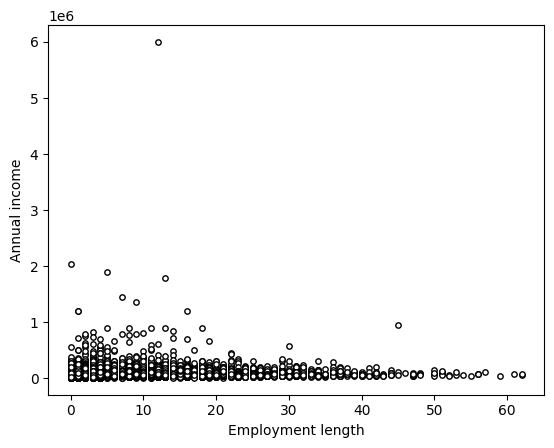

In [17]:
plt.scatter(data["emp_length"], data["annual_inc"], s = 15, color = "white", edgecolors = "black")
plt.xlabel("Employment length")
plt.ylabel("Annual income")
plt.show()

### Valores Perdidos

Hay tres maneras de tratar con datos faltantes:
- Eliminarlas
- Reemplazarlas
- Conservarlas

Contando los valores faltantes

In [18]:
data.isnull().sum(axis = 0)

loan_status          0
loan_amnt            0
int_rate          2776
grade                0
emp_length         809
home_ownership       0
annual_inc           0
age                  0
dtype: int64

Eliminamos las filas que tiene NaN en duración del empleo (emp_lenght)

In [19]:
data_no_NaN = data.dropna(axis = 0, subset = ["emp_length"])
data_no_NaN.shape

(28283, 8)

Ahora transformando los datos, el metodo usado es conservarlas con el método coarse classification

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29092 entries, 1 to 29092
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   loan_status     29092 non-null  int32   
 1   loan_amnt       29092 non-null  int32   
 2   int_rate        26316 non-null  float64 
 3   grade           29092 non-null  category
 4   emp_length      28283 non-null  object  
 5   home_ownership  29092 non-null  category
 6   annual_inc      29092 non-null  float64 
 7   age             29092 non-null  int32   
dtypes: category(2), float64(2), int32(3), object(1)
memory usage: 2.3+ MB


In [21]:
bins_emp = [-1, 15, 30, 45, max(data["emp_length"])]
labels_emp = ["0-15", "16-30", "31-45", "45+"]
data["emp_cat"] = pd.cut(data["emp_length"], bins = bins_emp, labels = labels_emp)
data["emp_cat"] = data["emp_cat"].cat.add_categories("missing").fillna("missing")

In [22]:
frecuencia_emp = data["emp_cat"].value_counts(dropna = False).sort_index()
print(frecuencia_emp)

emp_cat
0-15       25730
16-30       2272
31-45        253
45+           28
missing      809
Name: count, dtype: int64


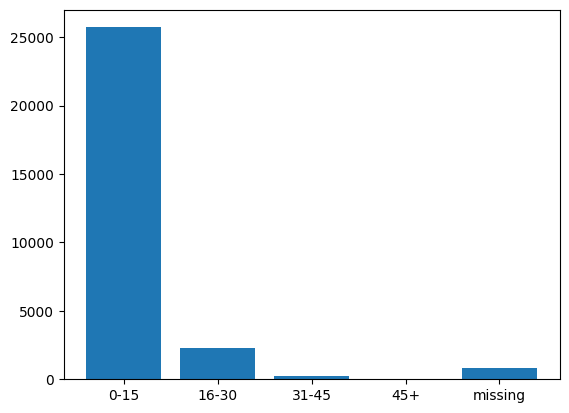

In [23]:
barplot_emp = plt.bar(frecuencia_emp.index, frecuencia_emp.values)

In [24]:
print(min(data["int_rate"]))
print(max(data["int_rate"]))

5.42
23.22


In [25]:
bins_emp = [0, 8, 11, 13.5, max(data["int_rate"])]
labels_emp = ["0-8", "8-11", "11-13.5", "13.5+"]
data["ir_cat"] = pd.cut(data["int_rate"], bins = bins_emp, labels = labels_emp)
data["ir_cat"] = data["ir_cat"].cat.add_categories("missing").fillna("missing")

In [26]:
frecuencia_ir = data["ir_cat"].value_counts(dropna = False).sort_index()
print(frecuencia_ir)

ir_cat
0-8        7130
8-11       6230
11-13.5    6954
13.5+      6002
missing    2776
Name: count, dtype: int64


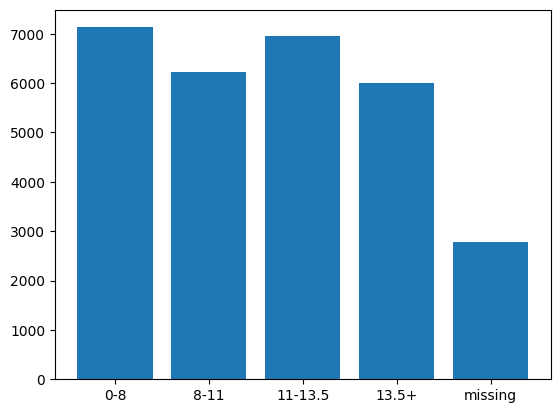

In [27]:
barplot_emp = plt.bar(frecuencia_ir.index, frecuencia_ir.values)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29092 entries, 1 to 29092
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   loan_status     29092 non-null  int32   
 1   loan_amnt       29092 non-null  int32   
 2   int_rate        26316 non-null  float64 
 3   grade           29092 non-null  category
 4   emp_length      28283 non-null  object  
 5   home_ownership  29092 non-null  category
 6   annual_inc      29092 non-null  float64 
 7   age             29092 non-null  int32   
 8   emp_cat         29092 non-null  category
 9   ir_cat          29092 non-null  category
dtypes: category(4), float64(2), int32(3), object(1)
memory usage: 2.3+ MB


In [29]:
data.isnull().sum(axis = 0)

loan_status          0
loan_amnt            0
int_rate          2776
grade                0
emp_length         809
home_ownership       0
annual_inc           0
age                  0
emp_cat              0
ir_cat               0
dtype: int64

## Regresion logistica

In [30]:
data_encoded = pd.get_dummies(data, columns = ["ir_cat"], drop_first= True)
print(data_encoded)

          loan_status  loan_amnt  int_rate grade emp_length home_ownership  \
rownames                                                                     
1                   0       5000     10.65     B         10           RENT   
2                   0       2400       NaN     C         25           RENT   
3                   0      10000     13.49     C         13           RENT   
4                   0       5000       NaN     A          3           RENT   
5                   0       3000       NaN     E          9           RENT   
...               ...        ...       ...   ...        ...            ...   
29088               0       2500      8.07     A          4       MORTGAGE   
29089               0       8500     10.28     C          3           RENT   
29090               0       5000      8.07     A          0       MORTGAGE   
29091               0       5000      7.43     A          0       MORTGAGE   
29092               0       7500       NaN     E          0     

In [31]:
data_encoded["ir_cat_missing"]

rownames
1        False
2         True
3        False
4         True
5         True
         ...  
29088    False
29089    False
29090    False
29091    False
29092     True
Name: ir_cat_missing, Length: 29092, dtype: bool

In [32]:
X = data_encoded[["ir_cat_8-11", "ir_cat_11-13.5", "ir_cat_13.5+", "ir_cat_missing"]]
y = data_encoded["loan_status"]

In [33]:
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [34]:
logreg.intercept_

array([-2.88439146])

In [35]:
logreg.coef_

array([[0.61258122, 1.00007171, 1.34218667, 0.74425717]])